# MLDS Workshop I

*10/16/17*

This notebook serves as an introduction to exploratory data analysis in Python using *pandas, numpy, OpenCV, seaborn, and matplotlib*.

*Pandas* is a Python package providing flexible and expressive data structures for data analysis. Pandas works well with relational and labeled data. http://pandas.pydata.org/pandas-docs/stable/

*Numpy* is an array-processing package enabling fast and convenient matrix manipulation among other scientific computing purposes. https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

*OpenCV* is a powerful computer vision library. http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

*Seaborn* is a statistical data visualization library. https://seaborn.pydata.org/api.html

*Matplotlib* is a plotting library inspired by MATLAB's native visualization API. https://matplotlib.org/tutorials/index.html


## Analyzing NFL Plays

Dataset: 2015 NFL Plays: https://www.kaggle.com/maxhorowitz/nflplaybyplay2015/version/2

We'll begin by importing some libraries needed for this section

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We'll use *pandas* to read in the dataset of 2015 NFL plays and check the dimensions in (row, column)

In [243]:
df = pd.read_csv('NFLPlaybyPlay2015.csv')
df.shape

/Users/keyurmuzumdar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(46129, 64)

We have 46129 rows (observations) and 64 columns (features). The columns are listed below. There exists an unnamed column which can often indicate a row ID. Because we already have our indices we can drop this column-- if we were building a model on this data we wouldn't want something irrelevant like row number to be considered.

df (our dataframe) . **drop** will drop the column with the specified name on **axis 1**. If you want to drop a row, use df.drop('name', 0) as axis 0 is row and axis 1 is column.

In [244]:
print(df.columns)
df = df.drop('Unnamed: 0', 1)

Index(['Unnamed: 0', 'Date', 'GameID', 'Drive', 'qtr', 'down', 'time',
       'TimeUnder', 'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln',
       'yrdline100', 'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam',
       'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp',
       'Touchdown', 'ExPointResult', 'TwoPointConv', 'DefTwoPoint', 'Safety',
       'PlayType', 'Passer', 'PassAttempt', 'PassOutcome', 'PassLength',
       'PassLocation', 'InterceptionThrown', 'Interceptor', 'Rusher',
       'RushAttempt', 'RunLocation', 'RunGap', 'Receiver', 'Reception',
       'ReturnResult', 'Returner', 'Tackler1', 'Tackler2', 'FieldGoalResult',
       'FieldGoalDistance', 'Fumble', 'RecFumbTeam', 'RecFumbPlayer', 'Sack',
       'Challenge.Replay', 'ChalReplayResult', 'Accepted.Penalty',
       'PenalizedTeam', 'PenaltyType', 'PenalizedPlayer', 'Penalty.Yards',
       'PosTeamScore', 'DefTeamScore', 'ScoreDiff', 'AbsScoreDiff', 'Season'],
      dtype='object')


Now we'll **head** the dataframe to see the first **3** rows and **tail** to see the last **4**.

In [245]:
df.head(3)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Season
0,2015-09-10,2015091000,1,1,NaN,15:00,15.0,3600.0,0.0,NE,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
1,2015-09-10,2015091000,1,1,1.0,15:00,15.0,3600.0,0.0,PIT,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
2,2015-09-10,2015091000,1,1,1.0,14:21,15.0,3561.0,39.0,PIT,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015


In [246]:
df.tail(4)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Season
46125,2016-01-03,2016010310,22,4,1.0,00:27,1.0,27.0,16.0,MIN,...,0,NaN,NaN,NaN,0,13.0,19.0,-6.0,6.0,2015
46126,2016-01-03,2016010310,22,4,2.0,00:24,1.0,24.0,3.0,MIN,...,0,NaN,NaN,NaN,0,13.0,19.0,-6.0,6.0,2015
46127,2016-01-03,2016010310,22,4,3.0,00:15,1.0,15.0,9.0,MIN,...,0,NaN,NaN,NaN,0,13.0,19.0,-6.0,6.0,2015
46128,2016-01-03,2016010310,22,4,4.0,00:01,1.0,1.0,14.0,MIN,...,0,NaN,NaN,NaN,0,13.0,19.0,-6.0,6.0,2015


Here's some information about the 5000th row in the dataframe. Because we know some of the column names we can print the information we're looking for. **.ix** lets you index a specific row in the format df.ix[row, column]. Because we used a **:** for the column, all columns are returned for the specified row.

In [247]:
print(df.ix[5000,:].desc)
print("Quarter:", df.ix[5000,:].qtr)
print("Down:", df.ix[5000,:].down)
print("Time:", df.ix[5000,:].time)

(6:17) (Shotgun) T.Yeldon up the middle to JAC 40 for 2 yards (O.Vernon).
Quarter: 4
Down: 2.0
Time: 06:17


Now let's try and count the number of each type of play. As we know, there's a "play" feature for each observation so we can count the number of occurances for each of the plays we'd like to check. df**.loc** allows us to index by a specific number and **.shape** lets us count them.

df.loc[df['PlayType']==play] returns a new dataframe of observations which have the specified PlayType. 

df2.shape[0] gives us the number of observations in the above dataframe to count the number of occurances.

In [248]:
plays = ['Run', 'Pass', 'Punt', 'Field Goal', 'QB Kneel','Kickoff', 'Onside Kick']
res = {}
for play in plays:
    df2 = df.loc[df['PlayType']==play]
    print("Number of ", play, " plays :", df2.shape[0])
    res[play] = df2.shape[0]

Number of  Run  plays : 13129
Number of  Pass  plays : 18323
Number of  Punt  plays : 2429
Number of  Field Goal  plays : 988
Number of  QB Kneel  plays : 425
Number of  Kickoff  plays : 2565
Number of  Onside Kick  plays : 67


To visualize this, we'll create a pie-chart using *matplotlib*. The **.pie** command takes in the values and the labels. Notice that we were using a dictionary called *res* above to count the number of occurances, so to just get the x and y values we need to make a new list for each as seen below.

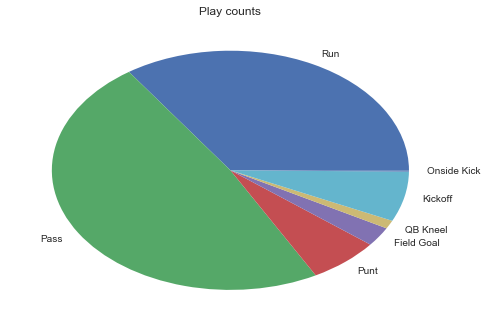

In [249]:
plt.pie([v for v in res.values()], labels=[k for k in res])
plt.title('Play counts')

Now let's try and figure out which teams scored the most touchdowns last in 2015. The first thing we'll do is create a new dataframe with just the team and touchdown features. Note that the team is given by an abbreviation and touchdown is binary (1 if touchdown, 0 if not)

In [250]:
new = df[['posteam', 'Touchdown']].copy()
new.head()

,posteam,Touchdown
0,PIT,0
1,PIT,0
2,PIT,0
3,PIT,0
4,PIT,0


Now we'll filter out the rows where there wasn't a touchdown and take the possession team. Our dataframe will then look like: 

`[HOU, HOU, HOU, HOU, NE, NE, NE, PIT]` indicating that Houston has four touchdowns, New England has three, and Pittsburgh has one, but with the actual data.

By dividing the number of rows in this dataframe by the number of total observations we can find the percentage of plays all season that were touchdowns.

In [251]:
td = new.loc[df['Touchdown'] == 1].posteam
print("% of touchdowns/ all plays:", td.shape[0]/new.shape[0]*100)
td.head() # first five rows

% of touchdowns/ all plays: 2.930911140497301


40      NE
58      NE
91      NE
101    PIT
129     NE
Name: posteam, dtype: object

We next want to count the number of occurances of each team in the above list to map each team to a number of touchdowns. This would convert the sample list above `[HOU, HOU, HOU, HOU, NE, NE, NE, PIT]` to a dictionary: 

`'HOU': 4, 'NE':3, 'PIT':1`

We use a `defaultdict` because it sets every value to 0 when we create it with the *int* argument. If we used a traditional dictionary, we'd first have to check if each key existed before incrementing the value. A `Counter`-- a type of `defaultdict` could also be useful.

In [252]:
from collections import defaultdict
d = defaultdict(int)
for team in td:
    d[team] += 1
print(d)
len(d.keys()) == 32

defaultdict(<class 'int'>, {'NE': 55, 'PIT': 43, 'GB': 45, 'CHI': 40, 'KC': 42, 'HOU': 40, 'CLE': 29, 'NYJ': 49, 'BUF': 45, 'IND': 36, 'WAS': 46, 'MIA': 37, 'CAR': 57, 'JAC': 48, 'STL': 31, 'SEA': 48, 'ARI': 56, 'NO': 52, 'DET': 41, 'SD': 40, 'TEN': 41, 'TB': 38, 'CIN': 55, 'OAK': 45, 'DEN': 38, 'BAL': 35, 'DAL': 31, 'NYG': 46, 'ATL': 40, 'PHI': 42, 'SF': 26, 'MIN': 35})


True

Finally, we'll use *Seaborn* to show the bar graph. While matplotlib can also accomplish this, Seaborn includes really nice features for data visualization and can be very powerful with many different types of plots.

Notice the line: `bar = sns.barplot(sorted(d.values(), reverse=True), sorted(d, key=d.get, reverse=True))`-- let's break this down.

First let's check the API for seaborn.barplot. https://seaborn.pydata.org/generated/seaborn.barplot.html

It appears that it can take a lot of arguments, but you only *need* `x` and `y` vectors. Recall that our data is a dictionary which looks like:

`'HOU': 4, 'NE':3, 'PIT':1`

So what we want to do is, for x, take all the touchdown values or the numbers associated with each team. We can accomplish this with `sorted(d.values(), reverse=True)`. What's happening is we sort all the values in decreasing order. This would produce an array: `[4, 3, 1]` for the above example. Next, to get the x-values which correspond to each one, we perform `sorted(d, key=d.get, reverse=True)` which sorts the keys in decreasing order. However, because we have to sort based on the numeric touchdown values, we can specify a sorting `key` with `key=d.get`. This would produce the array: `['HOU', 'NE', 'PIT']` for the above example. Finally we'll plot it.

[<matplotlib.text.Text at 0x143e095c0>, <matplotlib.text.Text at 0x130fc8c50>]

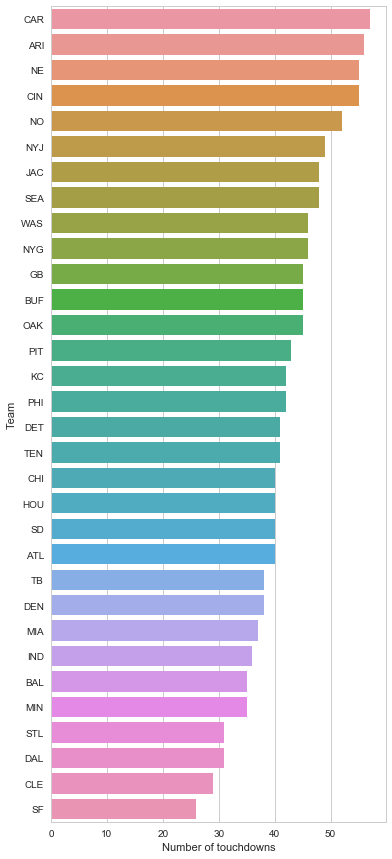

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
bar = sns.barplot(sorted(d.values(), reverse=True), sorted(d, key=d.get, reverse=True))
bar.set(xlabel='Number of touchdowns', ylabel='Team')

As we can see, Carolina led the league in touchdowns and the 49ers had the least.

## Image Processing

This section serves as an example to upload images, perform some processing, and understand some components of how they're represented in memory. We'll begin by using the image of *Lena*, a Playboy model whose picture is one of the most widely-used and widely-recognized in the computer vision industry (seriously). https://en.wikipedia.org/wiki/Lenna. She was even a guest of honor at the IEEE ICIP banquet in 2015. Flat regions, texture, and shading are reasons this image was nice for image processing examples, but it was also popular in a pretty male-dominant field back then. 

Anyway, the `%matplotlib inline` line lets us view images within the browser nicely through matplotlib. Let's upload and view the image.

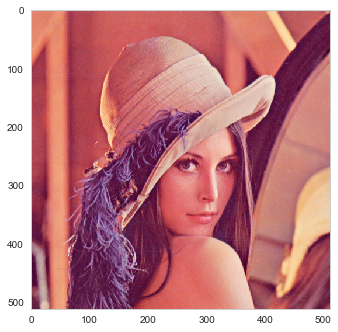

In [254]:
# Import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# %matplotlib inline
img=mpimg.imread('lena.png')
imgplot = plt.imshow(img)
plt.grid(False)
plt.show()

Let's check the dimensions of this image:

In [255]:
print(img.shape)
print(img[0][0][0])
print(type(img[0][0][0]))

(512, 512, 3)
0.886275
<class 'numpy.float32'>


From the above checks, we can see that the image is 512x512x3. The 3 represents each of the RGB color channels (red, green, blue). When we run `imshow`, the command knows to use the RGB values from each dimension. Moreover, the value at row=1, column=1, red-channel 0 is 0.88 and is a `float32`.

Now let's try and convert this image into grayscale. What we'll do is, for each row-column pixel, we'll take a weighted average of the R, G, and B components. There are various ways we can do this but a popular one based on how people see colors uses the following relation: `0.299*R + 0.587*G + 0.114*B`. We'll now create a new, 2D image (512x512x1) with this relationship to convert it to grayscale. When we show the picture, we use `cmap (color-map) = "gray"` to specify that the intensities are for gray-values from black to white.  

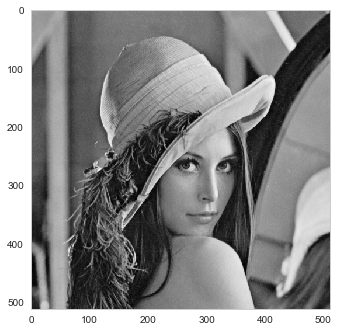

In [256]:
# Grayscale
def rgb2gray(img):
    def average(pixel):
        return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

    grey = np.zeros((img.shape[0], img.shape[1]))
    for rownum in range(len(img)):
        for colnum in range(len(img[rownum])):
            grey[rownum][colnum] = average(img[rownum][colnum])
            
    return grey

grey = rgb2gray(img)
plt.imshow(grey, cmap = "gray")
plt.grid(False)
plt.show()

Next, we'll convert this image to the popular 256-grayscale and check the distribution of gray levels. This 256-level scale basically means that each pixel can take on values from 0 to 255, 0 being black and 255 being white and is represented by 8 bits in memory (2^8 = 256). The way we accomplish this is turn first multiply each value by 255 to change the [0,1] scale to [0,255] scale, then use the useful *numpy* command, `astype` to cast them to integers. 

Next, we want to show the histogram, or the number of times each gray value occurs in the image. For the command `plt.hist`, we need to provide a list of values for it to count and specify the number of `bins` or potential values that each can take on. We accomplish this by turning the `MxN` matrix into an `MNx1` list with `ravel()` to turn the image into a long list of pixel values. We can then see the resulting histogram.

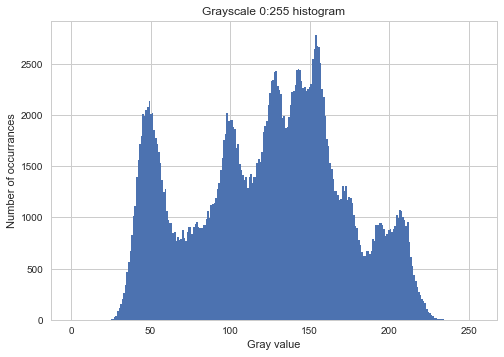

In [257]:
# Histogram of grayscale
grey *= 255
grey = np.array(grey)
grey = grey.astype(int)
plt.hist(grey.ravel(), bins=256, range=(0,255))
plt.title('Grayscale 0:255 histogram')
plt.xlabel('Gray value')
plt.ylabel('Number of occurrances')
plt.show()

As we can see above, the image uses a pretty wide range of the grayscale from ~25 to ~240 and has peaks at various gray-levels. The wider this histogram, the more different colors the image has to work with. We'll print the image again below with the values from 0=>255. It should look pretty much the same!

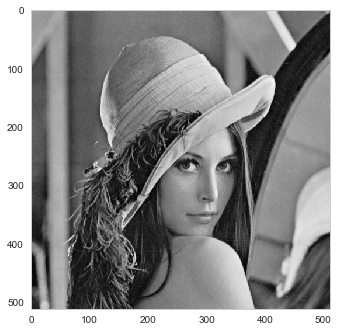

In [258]:
# Current image with above histogram
plt.grid(False)
plt.imshow(grey, cmap = "gray")

#### Overexposed images

To illustrate what we can do and understand with histograms, let's consider an *overexposed* image-- or an image that's really bright and mainly just uses the high values on the grayscale.

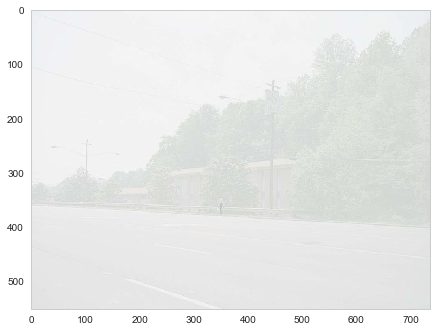

In [259]:
# Overexposed image
paul = mpimg.imread('paul.jpg')
plt.grid(False)
plt.imshow(paul)

Clearly, this is pretty difficult to see. Let's use a powerful package called *OpenCV* to do some more processing. If you're on a UNIX-based shell (Linux, MacOS/ OS X) or have *pip* installed, the below command should be able to satisfy this requirement. Otherwise, follow these steps: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_setup/py_setup_in_windows/py_setup_in_windows.html

In [260]:
!pip install opencv-python

Let's see the histogram for this image. Because we're using *OpenCV*, we can also use `img.flatten` to convert the image into a one-dimensional array.

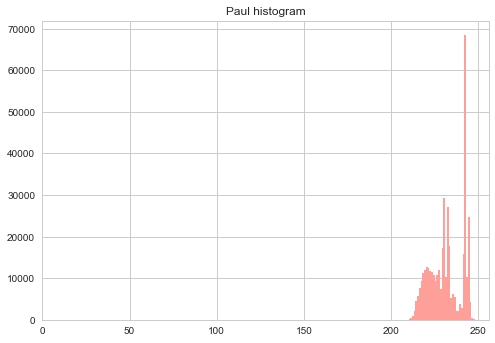

In [261]:
import cv2
img = cv2.imread('paul.jpg',0)
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.title("Paul histogram")
plt.show()

Clearly, this image only takes up the higher values of the grayscale and is pretty dense in that area. If we wanted to see more colors, it'd be better to try and use the entire grayscale to be able to recognize differences between objects and colors. One popular way is to stretch the histogram out to use the entire range and another performs a similar operation but also uses the CDF or cumulative distribution function of the histogram to pick new values. For now, let's just call *OpenCV's* `equalizeHist` function and see what happens. 

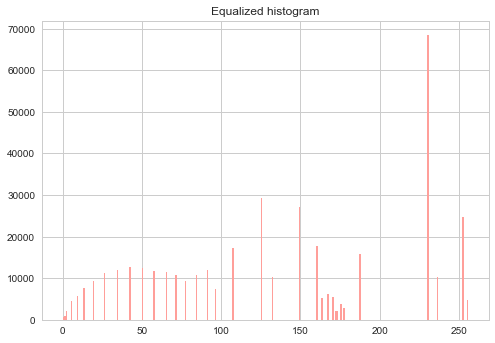

In [262]:
equ = cv2.equalizeHist(img)
plt.hist(equ.flatten(), 256, [0, 256], color = 'r')
plt.title("Equalized histogram")

The new histogram now makes use of the entire color scale available, and differences between colors should be more obvious in the new image-- let's see.

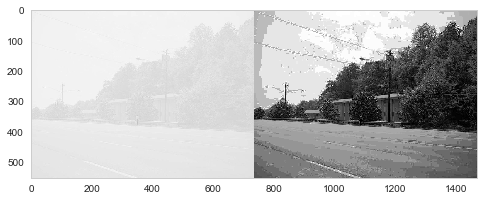

In [263]:
res = np.hstack((img,equ)) #stacking images side-by-side
plt.grid(False)
plt.imshow(res, cmap="gray")

Looks good to me!

#### CIFAR-10

For the competition, we will be using the CIFAR-10 dataset, which consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Downloading and extracting the dataset is a bit tricky, but here's the general approach.

https://www.cs.toronto.edu/~kriz/cifar.html

Follow this link to download the dataset, which will then consist of a few `batch` files. These files represent `pickled` versions of the images, which means they have been serialized into a byte stream for storage. We want to take these and deserialize them into a useable format with the following function (from the link above)

```
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
```

Detailed instructions are found above. Alternatively, if you have the deep-learning library *Keras* installed, you can import it directly. However, take note that these images are in float format still, so before we can do an `imshow` as we did above we should convert it into an image format with the `toimage` module from the `scipy` class as seen below. 

Anyway, to kick things off let's take nine images from the dataset and display them below to see what we'll be working with.

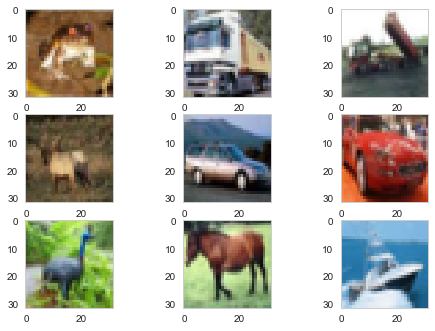

In [264]:
from keras.datasets import cifar10
from scipy.misc import toimage
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
for i in range(0, 9):
    plt.grid(False)
    plt.subplot(330 + 1 + i)
    plt.imshow(toimage(X_train[i]))
plt.grid(False)
plt.show()